# Problem Statement:
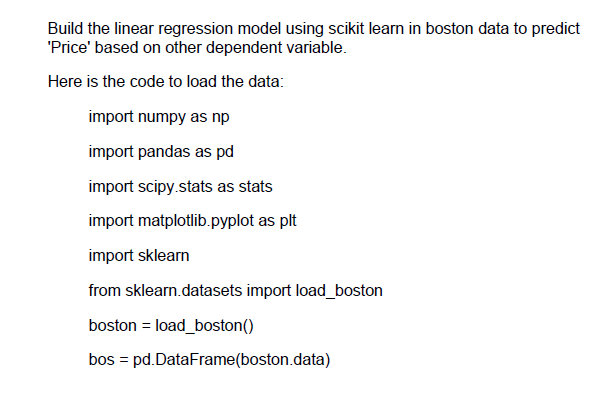

In [1]:
# Import lib
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
# boston datafram

In [3]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
data = pd.DataFrame(boston.data)
data.columns  = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = boston.target
print(len(y))

506


In [6]:
# find the unique value of CHAS & RAD
data.CHAS.unique()

array([0., 1.])

In [7]:
data.RAD.unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Text(0, 0.5, 'No.of.Rooms')

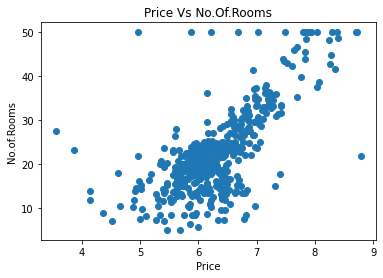

In [11]:
plt.scatter(data.RM,y)
plt.title('Price Vs No.Of.Rooms')
plt.xlabel('Price')
plt.ylabel('No.of.Rooms')

In [12]:
# Check the co-relation

In [13]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<AxesSubplot:>

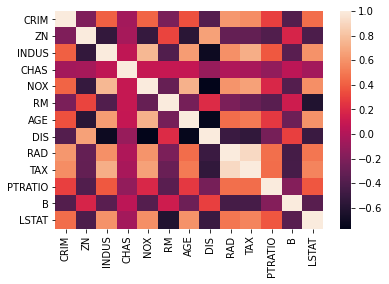

In [14]:
# Visual co-relation
sns.heatmap(data.corr())

In [15]:
# Sort the co-relation value
# Create correlation matrix
corr_mat = data.corr(method='pearson')
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

DIS    NOX     -0.769230
       AGE     -0.747881
       INDUS   -0.708027
LSTAT  RM      -0.613808
AGE    ZN      -0.569537
                  ...   
TAX    NOX      0.668023
       INDUS    0.720760
AGE    NOX      0.731470
NOX    INDUS    0.763651
TAX    RAD      0.910228
Length: 78, dtype: float64


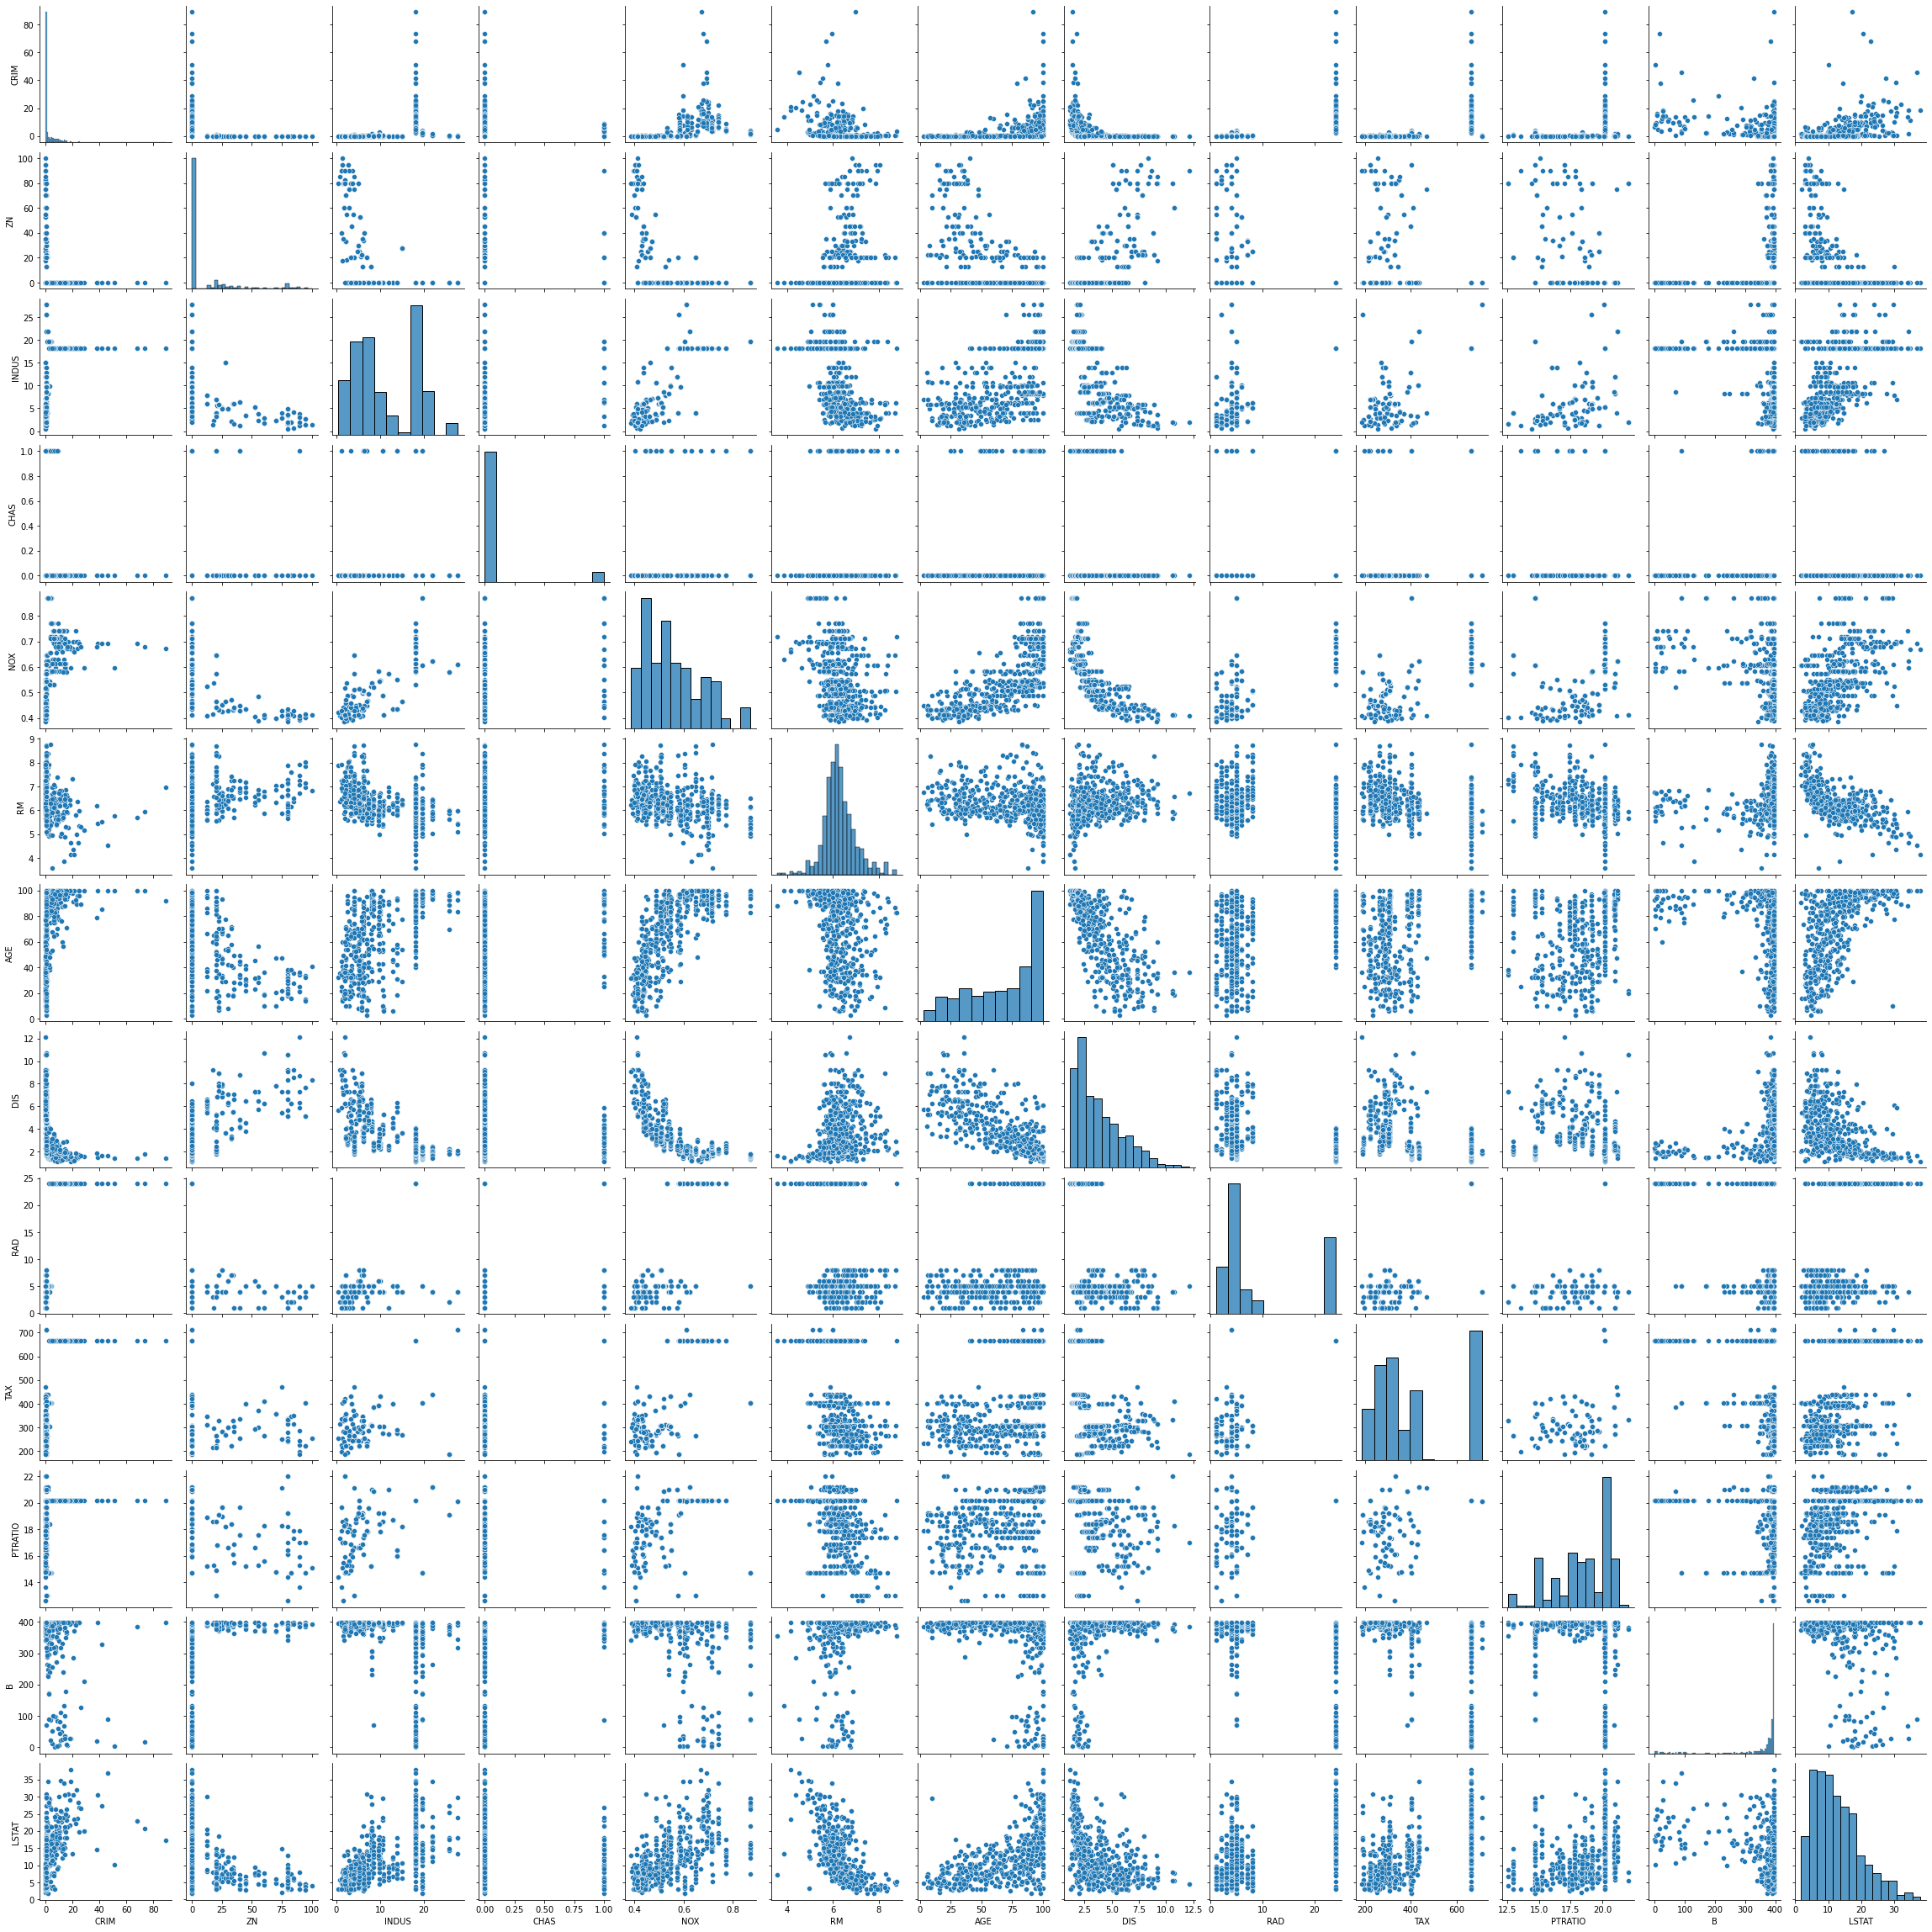

In [16]:
# Now, let's showcase the relationship between the all data column
sns.pairplot(data)

C:\Users\Sushil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sushil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sushil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

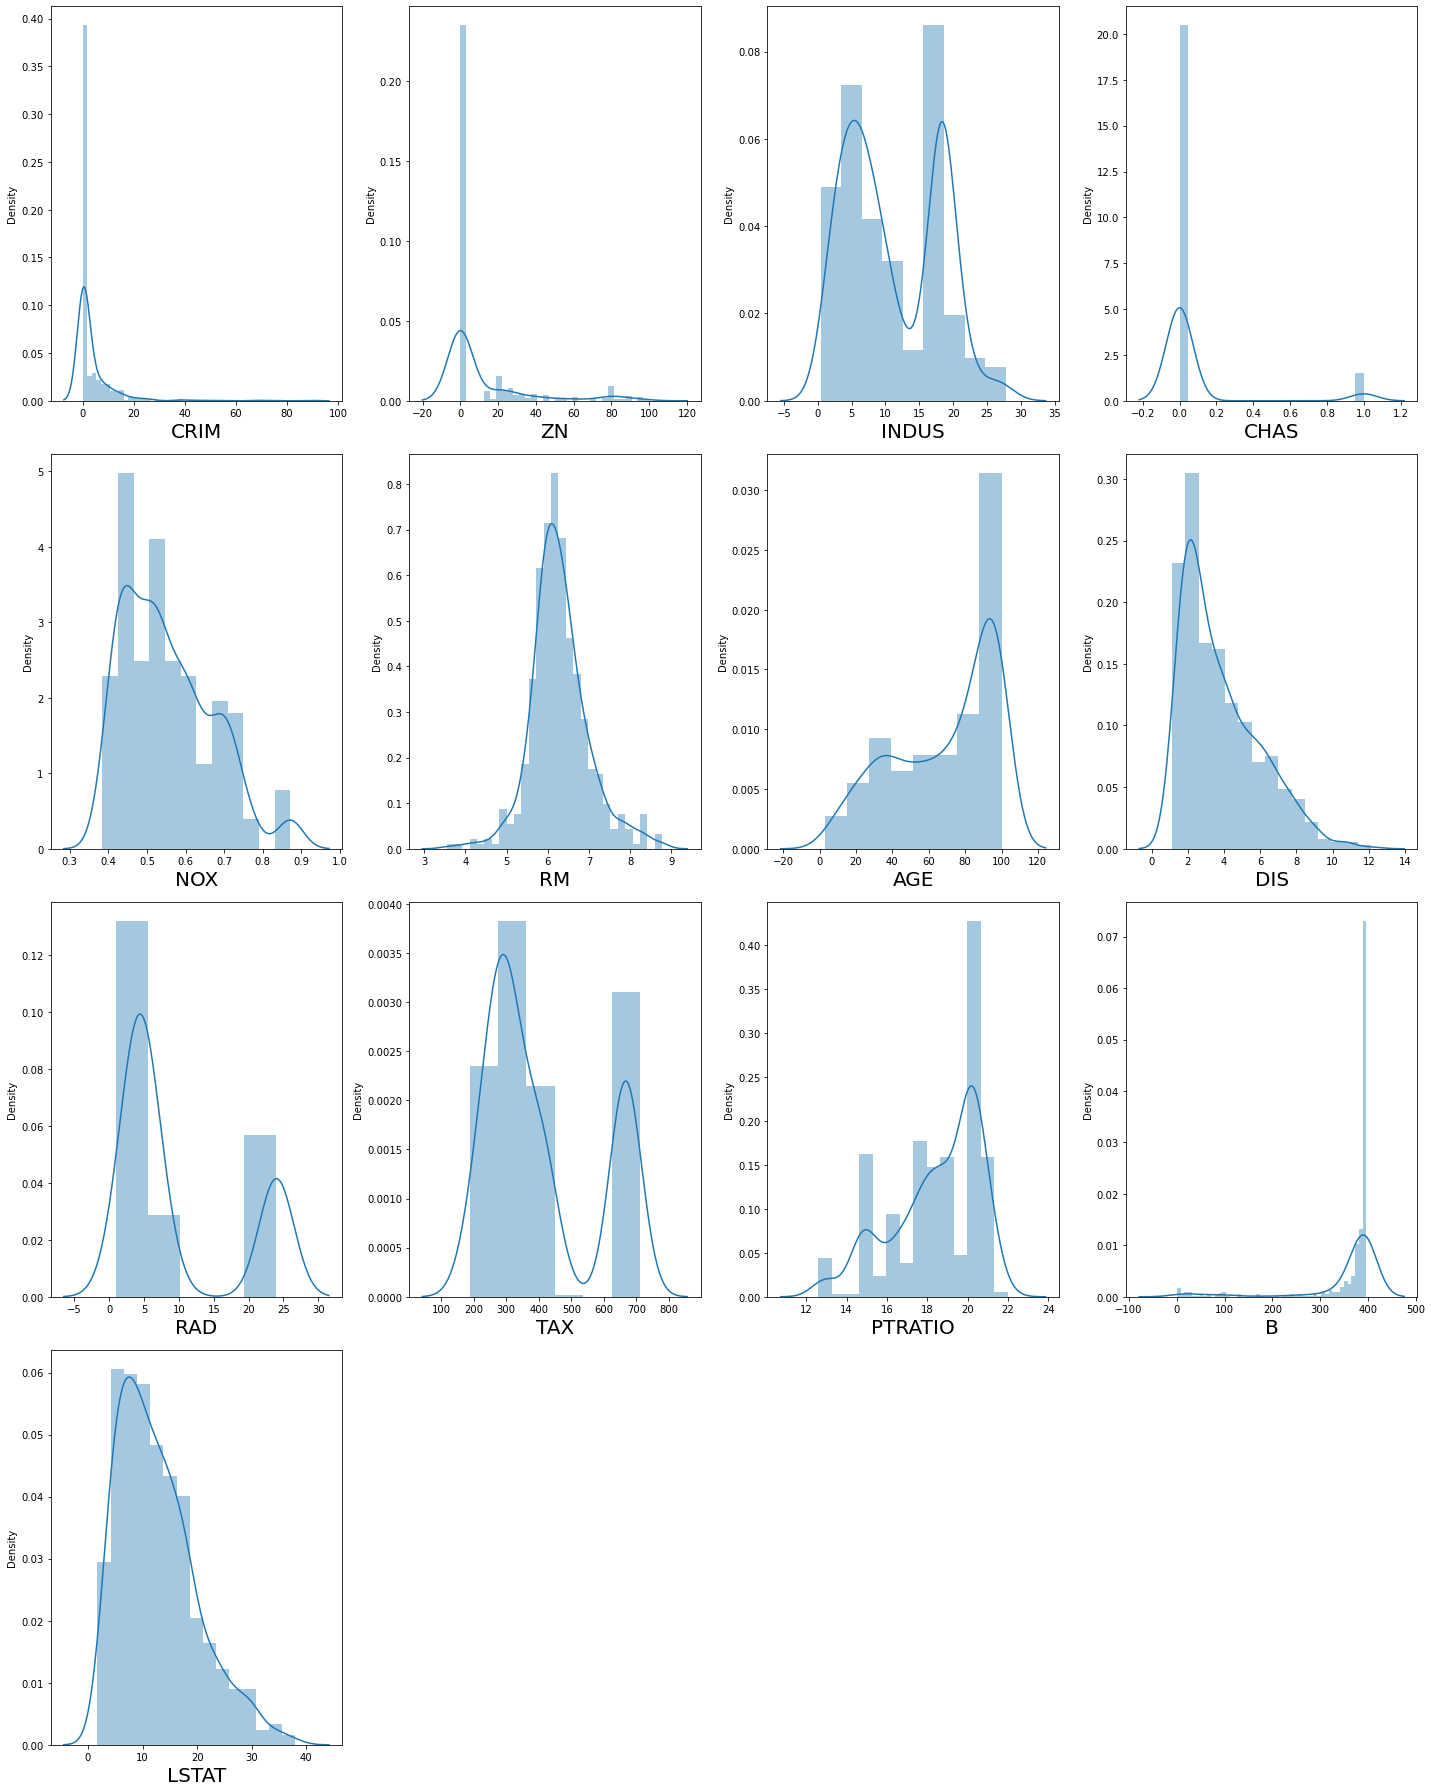

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Predict the new price using no.of.rooms (linear regresion)

In [18]:
# create X and y
feature_cols = ['RM']
X = data[feature_cols]


# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-34.670620776438554
[9.10210898]


In [19]:
# Predict with new value
#  Let's create a DataFrame since the model expects it
X_new = pd.DataFrame({'RM': [5]})
X_new.head()

,RM
0,5


In [20]:
lm.predict(X_new)

array([10.83992413])

In [21]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'RM': [data.RM.min(), data.RM.max()]})
X_new.head()

,RM
0,3.561
1,8.780


In [22]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([-2.25801069, 45.24589608])

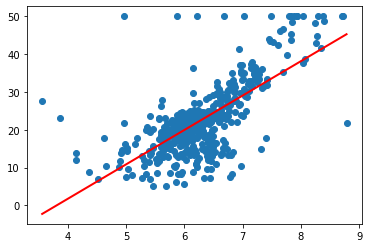

In [23]:
# Here we are passing min & max value thats why we are getting complete predicted line
# If we pass only 2 values we will get b/w points
# first, plot the observed data
plt.scatter(data.RM,y)

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

### Use stats model

In [24]:
#Stats model used for anaysis
## Sklearn used for model building and execution.
import statsmodels.formula.api as smf
lm = smf.ols(formula='y ~ data.RM', data=data).fit()
lm.conf_int()

,0,1
Intercept,-39.876641,-29.464601
data.RM,8.278855,9.925363


In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           2.49e-74
Time:                        15:45:50   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
data.RM        9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    6.950229e-34
data.RM      2.487229e-74
dtype: float64

In [27]:
lm.rsquared

0.483525455991334

Is it a "good" R-squared value? Now, that’s hard to say. In reality, the domain to which the data belongs to plays a significant role in deciding the threshold for the R-squared value. Therefore, it's a tool for **comparing different models**.

### Multiple Linear Regression

In [28]:
lm = LinearRegression()
lm.fit(data, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

36.45948838509011
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [29]:
# Using statistics
lm = smf.ols(formula='y ~ data',data = data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        15:45:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
data[0]       -0.1080      0.033     -3.287      0.001      -0.173      -0.043
data[1]        0.0464      0.014      3.382      0.001       0.019       0.073
data[2]        0.0206      0.061      0.334      0.738      -0.100       0.141
data[3]        2.6867      0.862      3.118      0.002       0.994       4.380
data[4]      -17.7666      3.820     -4.651      0.000     -25.272     -10.262
data[5]        3.8099      0.418      9.116      0.000       2.989       4.631
data[6]        0.0007      0.013      0.052      0.958      -0.025       0.027
data[7]       -1.4756      0.199     -7.398      0.000      -1.867      -1.084
data[8]        0.3060      0.066      4.613      0.000       0.176       0.436
data[9]       -0.0123      0.004     -3.280      0.001      -0.020      -0.005
data[10]      -0.9527      0.131     -7.283      0.000      -1.210      -0.696
data[11]       0.0093      0.003      3.467      0.001       0.004       0.015
data[12]      -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# From above summary we can say the below columns are negatively impact the price
data.columns[[0,2,4,6,7,9,10,12]]

Index(['CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

## Multi- Collinearity

In [31]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

X_scaled = scaler.fit_transform(data)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = data.columns

In [33]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We have RAD & TAX is highly multi correlated, we will drop the one of feature

Great. Let's go ahead and use linear regression and see how good it fits our data.
But first. let's split our data in train and test.

## Test Train

In [34]:
data.drop(['TAX'], axis=1,inplace=True)

In [35]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

In [37]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_scaled = scaler.fit_transform(data)

In [38]:
# Train & Test split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [39]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

379
379
127
127


In [40]:
regression = LinearRegression()
# for training we will fit
regression.fit(x_train,y_train)

LinearRegression()

In [41]:
regression.score(x_train,y_train)

0.7263352878677987

In [42]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [43]:
adj_r2(x_train,y_train)

0.7173626743552675

Our r2 score is 72.63% and adj r2 is 71.73% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [44]:
regression.score(x_test,y_test)

0.7431889797578299

In [45]:
adj_r2(x_test,y_test)

0.71615624078497

# Without Droping the column predection

In [46]:
data = pd.DataFrame(boston.data)
data.columns  = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [74]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [48]:
# Train & Test split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [49]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

379
379
127
127


In [50]:
regression = LinearRegression()
# for training we will fit
regression.fit(x_train,y_train)

LinearRegression()

In [51]:
regression.score(x_train,y_train)

0.7306475313474942

In [52]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [53]:
adj_r2(x_train,y_train)

0.7210541557516514

In [54]:
regression.score(x_test,y_test)

0.7519030329262335

In [55]:
adj_r2(x_test,y_test)

0.7233609039708444

In [56]:
filename = 'finalized_predict_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [75]:
loaded_model = pickle.load(open(filename, 'rb'))

In [78]:
prediction=loaded_model.predict([[-0.50352167,-0.35825747,-0.4849239,-0.50357269,-0.49922938,-0.45049227,
  0.02279131,-0.47055384,-0.49549962,1.88605529,-0.38005476,2.7006278,-0.46336881]])
print('prediction is', prediction)

prediction is [22.87614809]


## Lasso Regularization

In [57]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [58]:
alpha = lasscv.alpha_

In [59]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00033837642965584014)

In [60]:
lasso_reg.score(x_test, y_test)

0.7518957038694827

In [61]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
# Here we are passing randomly genrated alphas
# we can't pass None - because it's array of input default, either remove or give array of items
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([4.31025648, 0.71316656, 2.06348711, 9.0897823 , 8.91635481,
       7.04116242, 1.72881927, 0.95543142, 8.84513154, 4.06518514,
       6.23381162, 7.71785475, 3.46004652, 5.44495133, 0.98317162,
       5.47641296, 3.06257846, 8.02683206, 0.87446516, 5.90151554,
       7.95220599, 1.92926391, 0.49080274, 0.16752364, 5.20365482,
       6.34301253, 0.47656198, 0.40833244, 5.58959326, 5.97233365,
       4.56124467, 4.29536349, 5.59107707, 3.41087534, 3.10141337,
       7.55856809, 1.78333343, 6.62232826, 3.35403173, 8.5554694 ,
       4.28054538, 3.3467953 , 9.79352507, 3.32685768, 1.21737543,
       8.41634341, 6.37847419, 4.02672837, 1.42754127, 4.84326463]),
        cv=10, normalize=True)

In [62]:
ridgecv.alpha_

0.16752364344755244

In [63]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.16752364344755244)

In [64]:
ridge_model.score(x_test, y_test)

0.7518130541665267

In [65]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [66]:
elasticCV.alpha_

0.013238147250836638

In [67]:
elasticCV.l1_ratio

0.5

In [68]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.013238147250836638)

In [69]:
elasticnet_reg.score(x_train, y_train)

0.7304324481892646

In [70]:
elasticnet_reg.score(x_test, y_test)

0.7503011494807524

In [71]:
adj_r2(x_test,y_test)

0.7233609039708444